## Data Visualisation - Ford GoBike
### by Miji
### Preliminary Wrangling
This dataset has been shared by bike sharing company, Ford GoBike. The data includes many interesting information on users and their bike trips. I'm going to start with wrangling data to make it suitable for investigation.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
ford = pd.read_csv('fordgobike.csv')
ford.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### Chcking for any missing information

In [4]:
ford.isnull().sum()

# zero values in start_hour are normal as customer could rent the bike in midnight
# Since the numbers of missing values are less than 5 % of the whole dataset at most, I will remove the rows 

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [5]:
ford.dropna(inplace = True)

ford.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

### Removing unneccesary columns

In [6]:
# Since the information on latitude on longitute are not part of my interest, I will go ahead and remove related 4 columns.

ford.drop(columns = ['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'],
         inplace = True)

ford.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'end_station_id', 'end_station_name', 'bike_id',
       'user_type', 'member_birth_year', 'member_gender',
       'bike_share_for_all_trip'],
      dtype='object')

### Checking for datatypes of each column
- Object in 'start_time', 'end_time', 'member_birth_year' should be changed to Datetime. & extract hour
- Float types in 'start_station_id', 'end_station_id', 'bike_id' should be changed to String
- Object in 'user_type', 'member_gender', 'bike_share_for_all_trip' should be changed to Category

In [7]:
date_type = ['end_time', 'start_time']
str_type = ['start_station_id', 'end_station_id', 'bike_id']
cat_type = ['user_type', 'member_gender', 'bike_share_for_all_trip']

for d in date_type:
    ford[d] = ford[d].astype('datetime64[ns]')
    ford['start_day'] = ford[d].dt.day_name()
    ford['start_hour'] = ford[d].dt.hour
ford['end_hour'] = ford['end_time'].dt.hour

for s in str_type:
    ford[s] = ford[s].apply(lambda x: int(float(x))).astype('str')

for c in cat_type:
    ford[c] = ford[c].astype('category')

ford['member_birth_year'] = ford['member_birth_year'].astype('int64')

ford.start_time.replace('0', '24', inplace = True)
ford.end_time.replace('0', '24', inplace = True)

### Setting category order

In [8]:
day_lists = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

def orders(df):
    day_var = pd.api.types.CategoricalDtype(ordered = True, categories = day_lists)
    df['start_day'] = df['start_day'].astype(day_var)
    return print("Order setting successful")

orders(ford)

Order setting successful


### Checking for duplicated rows


In [9]:
ford.duplicated().sum()

0

### Checking for basic statistic

In [10]:
ford.describe()

,duration_sec,member_birth_year,start_hour,end_hour
count,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,1984.803135,13.456165,13.609533
std,1642.204905,10.118731,4.734282,4.748029
min,61.000000,1878.000000,0.000000,0.000000
25%,323.000000,1980.000000,9.000000,9.000000
50%,510.000000,1987.000000,14.000000,14.000000
75%,789.000000,1992.000000,17.000000,18.000000
max,84548.000000,2001.000000,23.000000,23.000000


### Amending birth year & Adding a categorical variable
We already have users' birth year. But it is not quite easy to understand only by birth year how old the user is, and what generation the user is. I am going to classify users' birth years into 4 parts, old & middle-aged, young adult and teenager. Old generations were born on from 1920 to 1961 (age 60 - 101). Middle aged generations were born on from 1961 to 1981 (age 40 - 59). Young adults were born on from 1982 to 2002 (age 19 - 39). Lastly, teenagers were born on from 2004 (age - 18).



In [11]:
ford['member_birth_year'].value_counts().sort_index(ascending = True).head(10)

1878     1
1900    53
1901     6
1902    11
1910     1
1920     3
1927     1
1928     1
1930     1
1931    89
Name: member_birth_year, dtype: int64

In [12]:
# I don't think some people's birth year of 1878, 1900, 1901, 1902, 1910 are true, considering the dataset has been created in 2019.
# I will amend selected birth years to the later dates

ford['member_birth_year'].replace([1878, 1900, 1901, 1902, 1910] , [1978, 2000, 2001, 2002, 2010], inplace = True)

ford['member_birth_year'].value_counts().sort_index(ascending = True).head()

1920     3
1927     1
1928     1
1930     1
1931    89
Name: member_birth_year, dtype: int64

In [13]:
gen_list = [1920, 1960, 1981, 2003, 2021]
ford['generation'] = pd.cut(ford['member_birth_year'], gen_list, labels = ['Old', 'Middle-aged', 'Young adult', 'Teenager'], 
       include_lowest = True, ordered = True, right = False)

ford.head()

# I will keep member_birth_year for now, just in case I might need the column in future analysis

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_hour,end_hour,generation
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,4902,Customer,1984,Male,No,Thursday,17,8,Young adult
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,Thursday,12,5,Middle-aged
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,70,Central Ave at Fell St,6638,Subscriber,1989,Other,No,Thursday,17,4,Young adult
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,Thursday,23,0,Middle-aged
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,323,Broadway at Kearny,5200,Subscriber,1959,Male,No,Thursday,23,0,Old


### What is the structure of the dataset?
The latest dataset consists of 183412 rows and 12 columns, after removing unnecessary columns. Most variables are categorical in nature - variables user_type, member_gender, bike_share_for_all_trip, start_day, generation. Member_birth_year, start_hour, end_hour, bike_id, duration_sec are numeric variables.

### What is/are the main feature(s) of interest in the dataset?
I'm interested in understanding what features are the best for predicting duriation of the bike sharing in the dataset.
I think the variables that show users' personal traits, such as generation, gender would be most helpful in understanding the user's behaviour. I also put an importance to usage patterns such as start day and start hour, to find out their ultimate needs for the sharing service. start_day, generation and gender would have the strongest correlation, considering that riding a bike is an activity mostly popular to young guys, and people prefer riding a bike on weekends when you have more time than weekdays. I also think generation, and start_hour would be correlated, but not as strong as the previous variables.


## Univariate Exploration
In this section, I am going to focus on investigating distributions of individual variables.

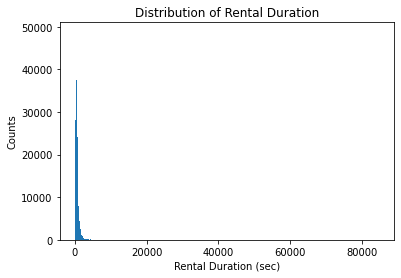

In [14]:
bins = np.arange(ford.duration_sec.min(), ford.duration_sec.max()+200, 200)
plt.hist(data = ford, x = 'duration_sec', bins = bins)
plt.title('Distribution of Rental Duration')
plt.xlabel('Rental Duration (sec)')
plt.ylabel('Counts');

# there is a very long tail on the right, so I will set log transformation to price

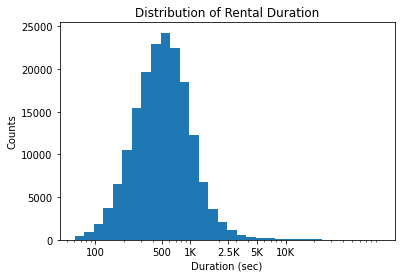

In [15]:
# start with a main variable of interest: duration

dur_list = [100, 500, 1000, 2500, 5000, 10000]
bins = 10** np.arange(np.log10(ford.duration_sec.min()), np.log10(ford.duration_sec.max())+0.1, 0.1)
       
plt.figure(figsize = (6,4))
plt.hist(data = ford, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks(dur_list, [100, 500, '1K', '2.5K','5K', '10K'])
plt.title('Distribution of Rental Duration')
plt.xlabel('Duration (sec)')
plt.ylabel('Counts');

# the distribution is a bit right-skewed. I will remove outliers whose duration is longer than 2,000

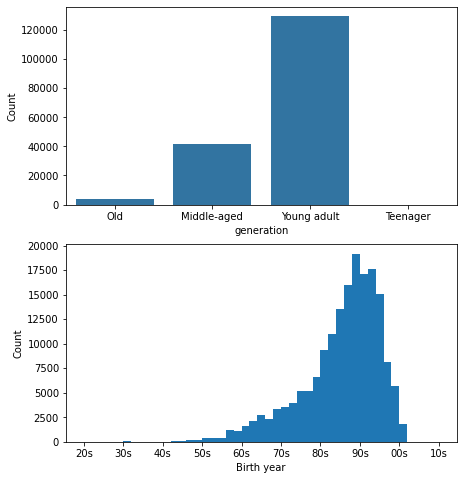

In [16]:
# Age & Generation distribution

fig, ax = plt.subplots(2,1, figsize = (7,8))
colors = sns.color_palette()[0]
bins = np.arange(ford.member_birth_year.min(), ford.member_birth_year.max()+2, 2)
age_list = [1920, 1930, 1940,1950, 1960, 1970, 1980, 1990, 2000, 2010]

sns.countplot(data = ford, x = 'generation', color = colors, ax = ax[0])
ax[0].set_ylabel('Count')
ax[1].hist(data = ford, x = 'member_birth_year', color = colors, bins = bins)
ax[1].set_xticks(age_list)
ax[1].set_xticklabels(['20s','30s','40s','50s','60s', '70s', '80s', '90s', '00s', '10s'])
ax[1].set_xlabel('Birth year')
ax[1].set_ylabel('Count');

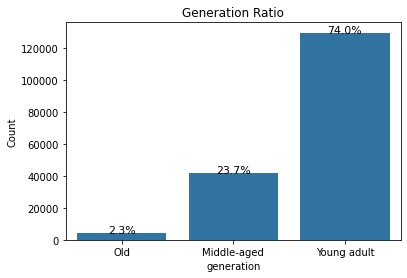

In [17]:
# Since the ratio of teenagers are too low, I will merge them into young adult group.

gen_list = [1920, 1960, 1981, 2021]
ford['generation'] = pd.cut(ford['member_birth_year'], gen_list, labels = ['Old', 'Middle-aged', 'Young adult'], 
       include_lowest = True, ordered = True, right = False)

gen_c = ford.generation.value_counts()
gen_order = gen_c.index
n_gen = ford.generation.value_counts().sum()

plt.figure(figsize = (6,4))
sns.countplot(data = ford, x = 'generation', color = colors)
plt.ylabel('Count')
plt.title('Generation Ratio')

locs, labels = plt.xticks() 
for loc, label in zip(locs, labels):
    count = gen_c[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_gen)
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'black', fontsize = 11);
    
# birth year histogram is left skewed. I will remove outliers with birth year earlier than 1950

- There are very few teenaged users, less than 2,500. I thought young guys would like to use the sharing service often because it's one of the most popular outdoor sport, but they could just own their bike.
- Users born between 1985 and 1995 take the biggest portion in the whole users. They should have graduated the college and already be working. Why would they rent a bike that often?

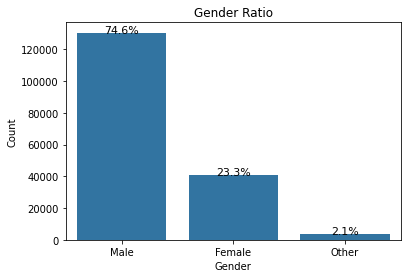

In [18]:
gender_c = ford.member_gender.value_counts()
gender_order = gender_c.index
n_gender = ford.member_gender.value_counts().sum()

plt.figure(figsize = (6,4))
sns.countplot(data = ford, x = 'member_gender', color = colors, order = gender_order)
plt.title('Gender Ratio')
plt.xlabel('Gender')
plt.ylabel('Count');

locs, labels = plt.xticks() 
for loc, label in zip(locs, labels):
    count = gender_c[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_gender)
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'black', fontsize = 11)

Males tend to ride a bike 3 times more than females as I expected, since bike riding isn't a very popular sport among girls

In [19]:
# Since 'other' gender doesn't mean anything, I will delete the rows with gender other.

ford['member_gender'] = ford['member_gender'].astype(str)
ford = ford.loc[ford["member_gender"] != 'Other']
ford.dropna(inplace= True)
ford['member_gender'] = ford['member_gender'].astype('category')

ford.member_gender.value_counts()

Male      130500
Female     40805
Name: member_gender, dtype: int64

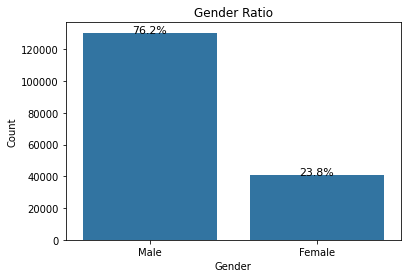

In [21]:
# Let's plot a new bar chart with new dataset

gender_c = ford.member_gender.value_counts()
gender_order = gender_c.index
n_gender = ford.member_gender.value_counts().sum()

plt.figure(figsize = (6,4))
sns.countplot(data = ford, x = 'member_gender', color = colors, order = gender_order)
plt.title('Gender Ratio')
plt.xlabel('Gender')
plt.ylabel('Count')

locs, labels = plt.xticks() 
for loc, label in zip(locs, labels):
    count = gender_c[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_gender)
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'black', fontsize = 11)

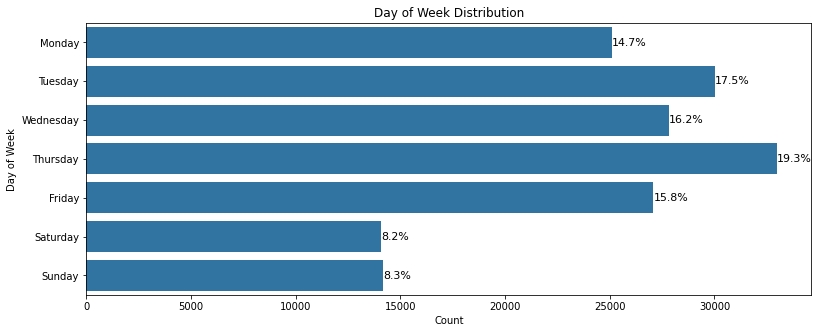

In [22]:
start_c = ford.start_day.value_counts().sort_index()
start_order = start_c.index
n_start = ford.start_day.value_counts().sum()

plt.figure(figsize = (13,5))
sns.countplot(data = ford, y = 'start_day', color = colors)
plt.title('Day of Week Distribution')
plt.ylabel('Day of Week')
plt.xlabel('Count')

for i in range (start_c.shape[0]):
    count = start_c[i]
    pct_string = '{:0.1f}%'.format(100* count/n_start)
    plt.text(count+1, i, pct_string, va='center', fontsize = 11);

It seems people ride a bike more often on weekdays than on weekends. I assumed users would share a bike for their pastime hobby on weekends, let's take a look at the data in different angels.

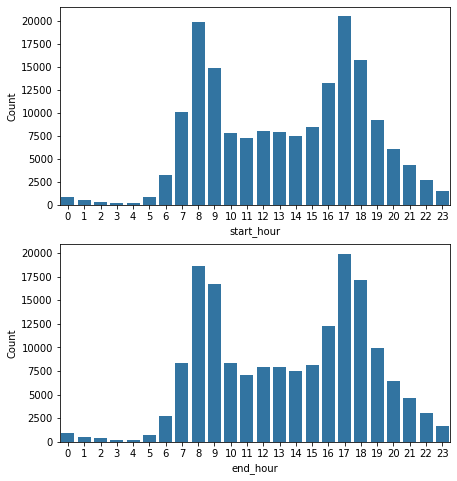

In [23]:
fig, ax = plt.subplots(2,1, figsize = (7,8))
colors = sns.color_palette()[0]

sns.countplot(data = ford, x = 'start_hour', color = colors, ax = ax[0])
ax[0].set_ylabel('Count')
sns.countplot(data = ford, x = 'end_hour', color = colors, ax = ax[1])
ax[1].set_ylabel('Count');

- There is a highest demand of bike sharing in 8 hrs - 9 hrs and 17 hrs - 18 hrs. Now we know that the reason of high demand during weekdays among young adults was that they are likely to rent a bike to commute. It also sounds plausible that teenagers were in the lowest demand, since they don't go need any means of transportation for work.
- But what about duration? Would duration be longest in 8 hrs - 9 hrs and 17 hrs - 18 hrs as well? Just because more people rent a bike, we can't tell that the average duration would be longer. We can dicuss this later during the bivariate analysis.
- The distiburion of start hour looks very similar to the one of end hour. It makes sense perfectly that they are highly related, as 3rd quartile of duration was 510 second in the previous analysis, which is less than 9 minutes.

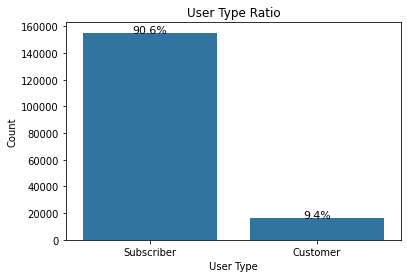

In [24]:
type_c = ford.user_type.value_counts()
type_order = type_c.index
n_type = ford.user_type.value_counts().sum()

plt.figure(figsize = (6,4))
sns.countplot(data = ford, x = 'user_type', color = colors, order = type_order)
plt.title('User Type Ratio')
plt.xlabel('User Type')
plt.ylabel('Count')

locs, labels = plt.xticks() 
for loc, label in zip(locs, labels):
    count = type_c[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_type)
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'black', fontsize = 11);

- Most of the users (over 90%) subscribe the service. They are likely to ride a bike regularly - probably young adults would take the biggest part of the subscribers. We can check this in a later analysis!

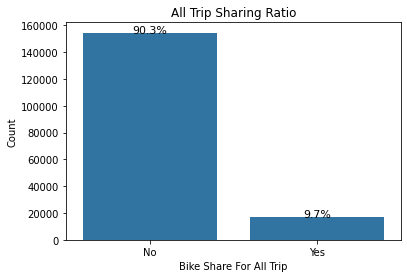

In [25]:
share_c = ford.bike_share_for_all_trip.value_counts()
share_order = share_c.index
n_share = ford.bike_share_for_all_trip.value_counts().sum()

plt.figure(figsize = (6,4))
sns.countplot(data = ford, x = 'bike_share_for_all_trip', color = colors, order = share_order)
plt.title('All Trip Sharing Ratio')
plt.xlabel('Bike Share For All Trip')
plt.ylabel('Count')

locs, labels = plt.xticks() 
for loc, label in zip(locs, labels):
    count = share_c[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_share)
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'black', fontsize = 11);

### Removing outliers

In [26]:
ford_n = ford.loc[(ford['member_birth_year'] >= 1950) & (ford['duration_sec'] <= 2000)]
orders(ford_n)

# We are removing outliers with birth year earlier than 1950 OR duration_sec longer than 2000 
# 'orders' function is to set the right order of 'start_day' category 

Order setting successful


<ipython-input-8-f93844ede3bd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start_day'] = df['start_day'].astype(day_var)


### Let's draw new plots with amended datasets

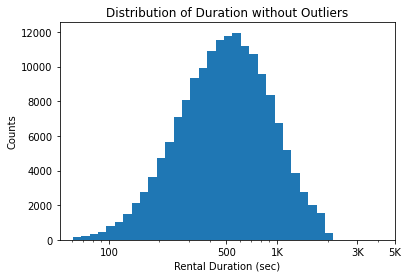

In [27]:
dur_list = [100, 500, 1000, 3000, 5000]
bins = 10** np.arange(np.log10(ford_n.duration_sec.min()), np.log10(ford_n.duration_sec.max())+0.05, 0.05)
           
plt.figure(figsize = (6,4))
plt.hist(data = ford_n, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks(dur_list, [100, 500, '1K', '3K', '5K'])
plt.title('Distribution of Duration without Outliers')
plt.xlabel('Rental Duration (sec)')
plt.ylabel('Counts');

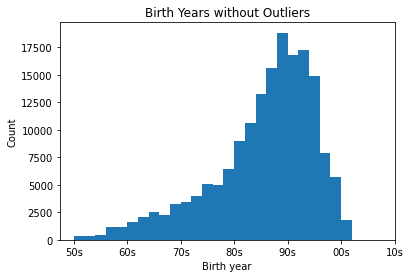

In [28]:
bins = np.arange(ford_n.member_birth_year.min(), ford_n.member_birth_year.max()+2, 2)
age_list = [1950, 1960, 1970, 1980, 1990, 2000, 2010]

plt.figure(figsize = (6,4))
plt.hist(data = ford, x = 'member_birth_year', color = colors, bins = bins)
plt.xticks(age_list, ['50s','60s', '70s', '80s', '90s', '00s', '10s'])
plt.xlabel('Birth year')
plt.ylabel('Count')
plt.title('Birth Years without Outliers');

Both plots are still a bit skewed, but look much better now!